# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Estimation - Likelihood

### Parameters, Models and Real Life

What do we mean by parametric estimation?  In parametric estimation, we assume that the data comes from a particular type of probability distribution and we try to estimate the parameters of that distribution.  What are parameters, in a statistical sense?  Remember the $Bernoulli(\theta)$ random variable?  A $Bernoulli$ distribution has one parameter, usually denoted as $\theta$.  We talked about modelling events such as the outcome of a toss of a coin as using the $Bernoulli(\theta)$ random variable.  If the coin is fair then, in our model, $\theta = \frac{1}{2}$.  If the random variable $X$ takes value 1 when the fair coin lands heads, then we model $P(X = 1) = \frac{1}{2}$.

When we speak about the probability of observing events such as the outcome of a toss of a coin, we are assuming some kind of model.  In the case of a coin, the model is a $Bernoulli$ RV. This model would have one parameter,  the probability of the coin landing heads.

When we introduced the $Exponential$ distribution, we talked about the $Exponential(\lambda$) RV, or the $Exponential$ parameterised by $\lambda$.  Distributions can be parameterised by more than one quantity.  We have already met the $Uniform(\theta_1, \theta_2)$ - this has two parameters, $\theta_1$ and $\theta_2$.  Another distribution you may be familiar with, although we have not discussed it in this course, is the Normal distribution which is parameterised by $\mu$ and $\sigma$.   The symbols like $\theta$, $\lambda$, $\mu$, $\sigma$ are conventionally used for the parameters of these distributions.  It is useful to  become familiar with these conventions (see for example Wikipedia on the Exponential  or Normal)

There are many applications of computational statistics which involve models of real life events, and it is not enough to say "this can be modeled with a $Bernoulli$ RV", or "Orbiter bus inter-arrival times can be modelled with an $Exponential$ RV".  We also have to choose parameters for our models.

We also remind ourselves that the probabilty density function (probability mass function for a discrete random variable) and distribution function depend on the parameters when we write them.  In the case of the $Bernoulli$, for example, the probability mass function is denoted by  $f(x;\theta)$.  

In real life, we are usually not trying to do "textbook" examples like calculating the probability of an event given a distribution and parameter value(s).  We may be able to see the outcomes of a process, but we can never know exactly what that process is, all we can do is try to find a useful model for it.  We are trying to use the information available to us in the form of observations or data to make our models, including guessing/estimating values for the model parameters.   We have to turn our thinking around and focus on what the data can tell us about the model.  In particular, in this course, we focus on what the data can tell us about model parameters - parametric estimation.   Now is a good time to reflect on these words of the renowned Statisticians:

> All models are wrong, but some are useful --- George Edward Pelham Box

> The only math I did not use is the one I did not know -- Lucien Le Cam

### The Likelihood Function

Likelihood, as we said above, is a fundamental concept in statistical inference ("inference" - making inferences from observations, making guesses based on information in data).

In informal terms, likelihood is "the likelihood of the parameters for the observed data".  More formally, *likelihood is a function of the parameter and is proportional to the conditional probability of the data given the parameter*. 

We can talk about a likelihood function where the domain of the likelihood function is all the possible values for the parameters (remember, a function is a mapping from a domain to a range): the likelihood function is a mapping from possible values for the parameters to the likelihood of those parameters for the data.  

The likelihood function of $\theta$ based on $n$ observations $x_1, x_2, \ldots, x_n$ is denoted $L_n(\theta)$.  We have said that it is a mapping from "all possible values for the parameters", i.e. all possible values for $\theta$, to the likelihood of those parameters given the data $x_1, x_2, \ldots, x_n$.  In our formal notation, if we know that $\theta$ must be somewhere in the parameter space ${\mathbf{\Theta}}$, then $L_n(\theta)$ is a mapping from $\mathbf{\Theta}$ to the real numbers $\mathbb{R}$:

$$L_n(\theta): \mathbf{\Theta} \rightarrow \mathbb{R}$$

For example, in the case of a $Bernoulli(\theta)$ RV, we know that the parameter $\theta$ must be between $0$ and $1$, or $\theta \in [0,1]$.  In the case of an $Exponential(\lambda)$ random variable parameterised by $\lambda$, we know $\lambda > 0$, i.e., $\lambda \in \mathbf{\Lambda} = (0,\infty)$. 

NOTE: $\Lambda$ is the Greek upper-case of $\lambda$, which as usual we reserve for random variables taking values in $\mathbf{\Lambda}$. These distinctions are not too impotant for this course, and we will keep the notation light here, but when you learn more advanced concepts in statistical machine learning and Bayesian inference, it will become very important to keep the notations clear between samples, random variables and the space where they take their values for data, statistics and parameters (which themselves become random variables in advanced courses you may take in a couple years).

We will focus on the likelihood function for independent and identically distributed (IID) random variables.

Suppose we have $X_1,X_2,\ldots,X_n$ as $n$ independent random variables and they are all identically distributed with $f(x;\theta)$.   We would write this as $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$. Here $(X_1,X_2,\ldots,X_n)$ is an $\mathbb{R}^n$-valued random variable (sometimes called a random vector). Then, 

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$$

merely means, due to independent and identical distribution among all $X_1,X_2,\ldots,X_n$, that the $\mathbb{R}^n$-valued random variable $(X_1,X_2,\ldots,X_n)$ has joint density:

$$f(x_1,x_2,\ldots,x_n; \theta) = f(x_1;\theta)\times f(x_2;\theta) \times \cdots \times f(x_n;\theta) = \prod_{i=1}^n f(x_i;\theta) $$

Thus, $f(x_1,x_2,\ldots,x_n; \theta)$ is termed the joint density of the data $(X_1, X_2, \ldots, X_n)$ for a given $\theta$.

In conclusion, when $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$ the joint density $f(x_1, x_2, \ldots, x_n; \theta)$ is the product of the individual densities $\displaystyle \prod_{i=1}^n f(x_i ; \theta)$. 


This implies that the likeilihood function $L_n(\theta)$, which formally also depends on the observed data, is:
$$
\begin{array}{ll}
L_n(\theta) &:= L_n(\theta; x_1,x_2,\ldots,x_n) = L_n(\theta; \text{ data })\\
&\propto P(\text{ data } | \theta)\\
&= f(x_1,x_2,\ldots,x_n; \theta)\\
&= f(x_1;\theta)\,f(x_2;\theta) \ldots f(x_n;\theta) \\
&=: \prod_{i=1}^n f(x_i ; \theta)\\
\end{array}
$$


So when $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$, 

$$
\boxed{L_n(\theta) := \prod_{i=1}^n f(x_i ; \theta)}
$$
 

#### The likelihood Function for the $Bernoulli(\theta)$ RV

We can make all this theory a little more real by considering the $Bernoulli$ RV.  In the last worksheet, we wrote function to be able to simulate samples from a $Bernoulli(\theta)$ RV given some value for the parameter $\theta$ and the number of samples required.  Suppose we used this function, with a small adaptation, to simulate some samples now using $\theta^*$ - but there is a catch:  you don't know what the value of $\theta^*$ is. 

#### Prepare to simulate data from a secret $\theta^*$

Just place cursor on next hidden cell hit 'Run' button to evaluate it - its generating our simulated data from a secret $theta^*$ that we will not see by clicking on _here_ below. It has a function `bernoulliSampleSecretTheta(n)` that will produce $n$ IID $Bernoulli(\theta^*)$ samples for us.

In [2]:
## this can be hidden after evaluation to save space on display
from random import random
from math import floor
from random import seed as set_random_seed

def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSampleSecretTheta(n, theta=0.30, mySeed=30):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param mySeed is a seed for the random number generator, defaulting to None.
    Returns a simulated Bernoulli sample as a list.'''
    set_random_seed(mySeed)
    us = [random() for i in range(n)]
    set_random_seed(None)
    # use bernoulliFInverse in a list comprehension
    return [bernoulliFInverse(u, theta) for u in us] 


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
## Press Ctrl+Enter to evaluate this cell 
## and obtain our data, i.e., sample of 10 Bernoulli(theta*) RVs
bSample = bernoulliSampleSecretTheta(10)
print( bSample)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [4]:
## evaluate the hidden cell above and hide it immediately - its generating our simulated data from a secret theta*

What we have is $X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ where $\theta^* \in [0,1]$ is the true, but unknown value (assuming you have not peeked into click `here` above!) of the parameter $\theta$ responsible for producing all those observations in `bSample`.

Recall that the $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} 
=\begin{cases}
\theta & \text{ if } \ x=1,\\
1-\theta &\text{  if } \ x=0,\\
0 & \text{ otherwise} 
\end{cases}
$$

So, for $x_1, x_2, \ldots, x_n \in \{0,1\}$, the joint density of $n$ IID $Bernoulli(\theta)$ RVs is:

$$
\begin{array}{lcl}
f(x_1,x_2,\ldots,x_n; \theta) 
:= \displaystyle\prod_{i=1}^n f(x_i ; \theta) 
& = & \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}\\ 
& = & \theta^{\sum_{i=1}^n x_i} (1-\theta)^{\left(n - \sum_{i=1}^n x_i\right)} 
\end{array}
$$

$\sum_{i=1}^n x_i$ is a bit of a mouthful, so lets summarise this as $t_n = \displaystyle\sum_{i=1}^n x_i$

We can use $t_n$ to make our likelihood function a little more friendly:

$$L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$$

What we have actually done is to *define a statistic of the data*.  Remember that a statistic is a function of the data.  We will call our statistic (note the big $T$) $T_n$.  The $n$ subscript reminds us that it is a function of $n$ observations or data points $X_1,X_2,\ldots,X_n$. 

$T_n$ is a function of the data, a mapping from the data space $\mathbb{X} = \{0,1\}^n$ to the space $\mathbb{T}_n$:

$$
T_n(X_1, \ldots, X_n) = \displaystyle \sum_{i=1}^n X_i : \mathbb{X} \rightarrow \mathbb{T}_n
$$

If you are wondering what the space $\mathbb{T}_n$ is for the $Bernoulli$, think about the range of possible values of $\displaystyle\sum_{i=1}^n X_i$ when each $X_i$ can only be 0 or 1..... Now, do you agree that $\mathbb{T}_n=\{0,1,\ldots,n\}$? If so, observe that the size of the data space $\mathbb{X}_n$ is $2^n$ but that of the statistic $\mathbb{T}_n$ is just $n+1$. The natural question now is if we have lost any information about the parameter $\theta$ that was in the data when summarising the data by this statistic? Such questions of so called *[sufficiency](https://en.wikipedia.org/wiki/Sufficient_statistic) of the statistic for the probability model parameterised by $\theta$ that is assumed to be generating the data* are the starting point for a more mathematical statistical path one can take. We will not delve into this here.

**In conclusion**, we have some actual observations or data points or just sample $(x_1, \ldots, x_n)$, such that:

- $(x_1, \ldots, x_n)$ as a realisation of $\mathbb{X}$-valued random variable $(X_1,X_2,\ldots,X_n)$ from $n$ IID $Bernoulli(\theta)$ trials
  - with joint density $f(x_1,x_2,\ldots,x_n; \theta): \mathbf{X} \to \mathbb{R}$ 
- and corresponding to this we have a realisation of our statistic $T(X_1,X_2,\ldots,X_n)=\sum_{i=1}^n X_i : \mathbb{X} \to \{0,1,\ldots,n\}$:
  - $T_n(x_1, \ldots, x_n) = t_n = \displaystyle\sum_{i=1}^n x_i$
- and finally we can express the likelihood function as $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$

We can easily use Python to calculate $t_n$ for us, using the sum function.  For example, for the small sample of 20 simulated Bernoulli observations above:

In [5]:
tn = sum(bSample)
tn

1

We can also write ourselves a Python function to calculate the likelihood of a specified value of $\theta$ given $n$ and $t_n$.  

In [6]:
def likelihoodBernoulli(theta, n, tStatistic):
    '''Bernoulli likelihood function.
    theta in [0,1] is the theta to evaluate the likelihood at.
    n is the number of observations.
    tStatistic is the sum of the n Bernoulli observations.
    return a value for the likelihood of theta given the n observations and tStatistic.'''
    retValue = 0 # default return value
    if (theta >= 0 and theta <= 1): # check on theta
        mpfrTheta = theta
        retValue = (mpfrTheta**tStatistic)*(1-mpfrTheta)**(n-tStatistic)
    return retValue

#### YouTry

You should be able to understand what the `likelihoodBernoulli` function is doing and be able to write this kind of Python function for yourselves.  Why do we need to check that the value for `theta` passed to the function is between 0 and 1?  How does the function deal with a situation where it is asked to evaluate a likelihood for `theta < 0` or `theta > 1`?

(end of You Try)

---

Let's look at a very simple situation where we have one observation ($n=1$) and it is a 0.  What is the realisation of $T_1$, i.e., $t_1$?

In [7]:
bernoulliSample0 = [0]
tn = sum(bernoulliSample0)
tn

0

#### YouTry

Try going back to the $Bernoulli$ likelihood function $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to calculate the likelihood of $\theta =0$ without using the Pythob function. Think about what the likelihood function is doing (the mathematical derivation for the $Bernoulli$ case was already scribed above, but you need to be able to do such derivations on your own in the exam or in assignments when I give you another distribution that the data is independent and identically distributed from). 

When you have done that, check that you get the same answer using our `likelihoodBernoulli` Python function:

In [8]:
tryTheta0 = 0 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
## calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta0, n, tn)

1

What about $\theta = 1$?  What is the likelihood of $\theta = 1$ when we have observed 0?  Think back to what the $\theta$ parameter means in a $Bernoulli$ distribution:

The $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} =\begin{cases}\theta& \text{ if } \ x=1,\\1-\theta &\text{ if } \ x=0,\\0 & \text{ otherwise} \end{cases}
$$

Remember that the idea behind the likelihood function is "what is the likelihood of a parameter value given our data?"

When you have worked out the answer using $L_n(\theta)$, check using our `likelihoodBernoulli` SageMath function:

In [9]:
tryTheta1 = 1 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
## calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0

What about $\theta = \frac{1}{2}$?

In [10]:
tryTheta1 = 0.5 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
## calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0.5

Try to sketch the likelihood function over $\theta \in [0,1]$ for our one observation of 0.

Now, what if instead of observing a 0 in our one-observation case, we had observed a 1?

What is our realisation of $T_n$ now?  What is our intuition about the likelihood of $\theta = 0$? $\theta = 1$? 

Again try to sketch the likelihood function for our single observation of 1.

We could use `likelihoodBernoulli` and a for loop to calculate the likelihood for some different values of $\theta$ without repeating code: 

In [11]:
bernoulliSample1 = [1]
n = len(bernoulliSample1) # find n as the length of the sample list
tn = sum(bernoulliSample1) # find tn as the sum of the samples
import numpy as np
for t in np.linspace(0, 1, 10):
    # calculate the likelihood of theta=tryTheta0=0
    print ("If we observe", bernoulliSample1, \
        "The likelihood of theta=", t, " is ", \
        likelihoodBernoulli(t, n, tn))

If we observe [1] The likelihood of theta= 0.0  is  0.0
If we observe [1] The likelihood of theta= 0.1111111111111111  is  0.1111111111111111
If we observe [1] The likelihood of theta= 0.2222222222222222  is  0.2222222222222222
If we observe [1] The likelihood of theta= 0.3333333333333333  is  0.3333333333333333
If we observe [1] The likelihood of theta= 0.4444444444444444  is  0.4444444444444444
If we observe [1] The likelihood of theta= 0.5555555555555556  is  0.5555555555555556
If we observe [1] The likelihood of theta= 0.6666666666666666  is  0.6666666666666666
If we observe [1] The likelihood of theta= 0.7777777777777777  is  0.7777777777777777
If we observe [1] The likelihood of theta= 0.8888888888888888  is  0.8888888888888888
If we observe [1] The likelihood of theta= 1.0  is  1.0


Or, we could use a list comprehension to get a list of likelihoods corresponding to the list of possible values of $\theta$:

In [12]:
ths = np.linspace(0, 1, 10)
[likelihoodBernoulli(t,len(bernoulliSample1),sum(bernoulliSample1)) \
     for t in ths]

[0.0,
 0.1111111111111111,
 0.2222222222222222,
 0.3333333333333333,
 0.4444444444444444,
 0.5555555555555556,
 0.6666666666666666,
 0.7777777777777777,
 0.8888888888888888,
 1.0]

(end of You Try)

---

Now, we look at a possible sample of $n=2$ observations from a Bernoulli process with unknown $\theta$:

In [13]:
smallBSample = [0,1]

What is $t_n$, the realisation of the $T_n$ statistic now with $n=2$?

In [14]:
tn = sum(smallBSample) # what is tn
tn

1

Use $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to think about the likelihood of some possible values for $\theta$ given this data.  Think what the shape of the likelihood function might be. 

In the visualisation below we have used our `likelihoodBernoulli` function to plot the likelihood function for the cases where we have a single observation 0, a single observation 1, and a small sample of size two with observations: 0, 1.

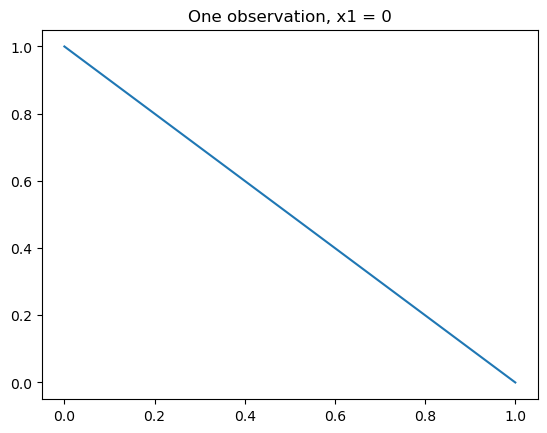

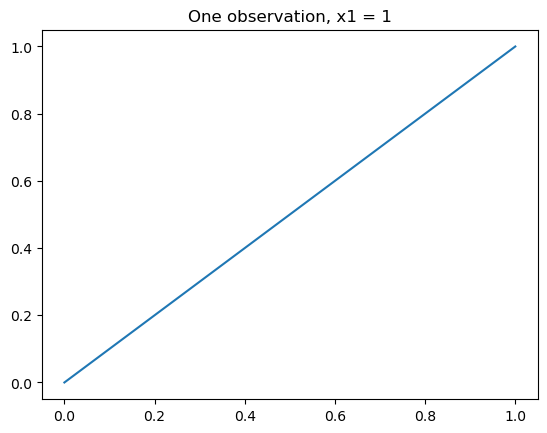

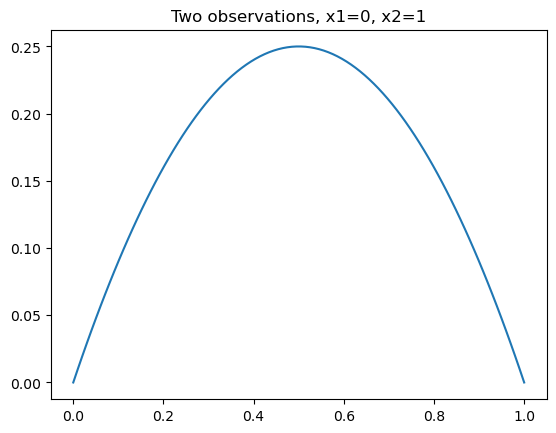

In [15]:
bernoulliSample0 = [0] # make sure we know about our samples
bernoulliSample1 = [1]
smallBSample = [0,1]
import matplotlib.pyplot as plt
ths = np.linspace(0,1,100) # get some values to plot against
plt.plot(ths, [likelihoodBernoulli(t, len(bernoulliSample0),sum(bernoulliSample0)) for t in ths])
plt.title("One observation, x1 = 0")
plt.show()
plt.plot(ths, [likelihoodBernoulli(t, len(bernoulliSample1),sum(bernoulliSample1)) for t in ths])
plt.title("One observation, x1 = 1")
plt.show()
plt.plot(ths, [likelihoodBernoulli(t, len(smallBSample),sum(smallBSample)) for t in ths])
plt.title("Two observations, x1=0, x2=1")
plt.show()

There are other samples we could get if we draw a sample of size $n=2$ from a $Bernoulli$ RV.  In the visualisation below we plot the likelihood functions for the four unique possible samples:

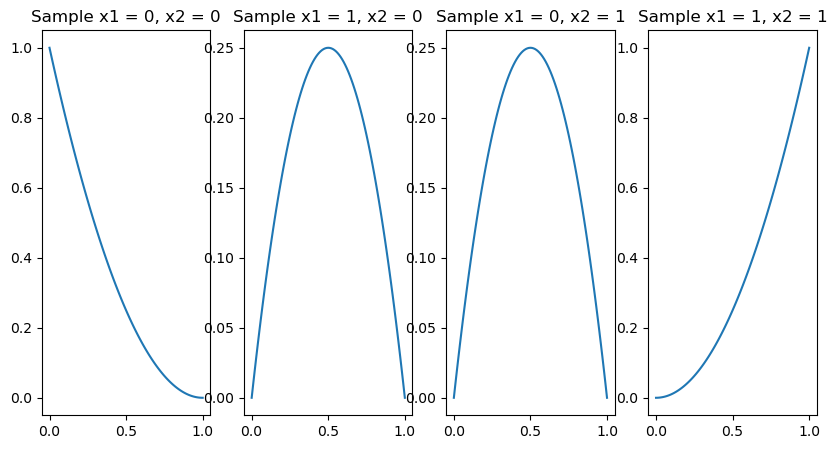

In [16]:
smallBSample1 = [0,0]
smallBSample2 = [1,0]
smallBSample3 = [0,1]
smallBSample4 = [1,1]
listOfSamples = [smallBSample1, smallBSample2, smallBSample3, smallBSample4] # a list of lists
fig,ax = plt.subplots(1,4,figsize=(10,5))
from pylab import arange
ths = arange(0,1.01,0.01) # get some values to plot against
l_plots = [] # an empty list of plots
for axis,sample in zip(ax,listOfSamples): # go through the list of samples one by one
    axis.set_title("Sample x1 = " + str(sample[0]) + ", x2 = " + str(sample[1]))
    axis.plot(ths, [likelihoodBernoulli(t, len(sample),sum(sample)) for t in ths])

We can see that the shape of the likekihood function depends on the sample:

- $(x_1,x_2) \in \{ (0,0), (1,0), (0,1), (1,1)\}$ 
- and more crucially on the statistic 
  - $t_2 \in \{0,1,2\}$
  
In the above plots we are looking at the likelihood for the parameter given the actual data (simulated here, of course for pedagogical reasons).  

As usual, you do not have to know how to do these plots or the interactive plot below to do well in the exam or assignments, but you should understand what a list comprehension statement like the following:

> `[likelihoodBernoulli(t,len(smallBSample),sum(smallBSample)) for t in ths]`

is doing, when `ths = arange(0, 1.01, 0.01)` are some possible values for $\theta \in [0,1]$.

What happens as we increase the sample size $n$?  In the interactive plot below, we use our `bernoulliSampleSecretTheta` to simulate samples of size $n$ with an unknown $\theta^*$.  You can have a look at the effect of increasing $n$:

In [17]:
from ipywidgets import interact, IntSlider

@interact
def _(n=IntSlider(1,1,500,25)):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print ("Likelihood function for n = ", n , " and tn = ", tn)
        from pylab import arange
        ths = arange(0,1,0.001) # get some values to plot against
        plt.plot(ths, [likelihoodBernoulli(t, n, tn) for t in ths])
    else:
        print( "n must be greater than 0")

interactive(children=(IntSlider(value=1, description='n', max=500, min=1, step=25), Output()), _dom_classes=('…

Remember that for each $n$ you try, the shape of the likelihood function will depend on the $t_n$ for the sample simulated by `bernoulliSampleSecretTheta`.

### The Log-likelihood Function

Working with products, as in 

$$
L_n(\theta) = \displaystyle \prod_{i=1}^n f(x_i;\theta) \quad \text{,  where  } X_1, X_2, \ldots, X_n \overset{IID} \sim f(x_i;\theta)
$$ 

(i.e., $n$ independent and identically distributed random variables), can be inconvenient. Taking logs can be useful here.  The log-likelihood function for some parameter $\theta$ is $l_n(\theta)$ and it is literally the log of the likelihood function $L_n(\theta)$:

$$l_n(\theta) := log(L_n(\theta))$$

You will probably recall from pre-calculus that $\log(a \times b) = \log(a) + \log(b)$.

In SageMath, using the `log` function without specifying a base gives the natural logarithm (logarithm to base $e$) of a value.

In [40]:
from math import log
a = 5.0
b = 6.0
log(a*b)

3.4011973816621555

In [41]:
log(a) + log(b)

3.401197381662155

In [20]:
## uncomment next line to see docs of `log`
#?log

The SageMath `log` function provides a default parameter value of `None` for the base, and if the base is `None` the natural log is calculated.  If you specify a value for the base when you use the `log` function, you will get the logarithm using this base (default parameter values and `Non`e were discussed in the last notebook:  go back there in your own time if you need to).

In [42]:
log(a, 10) # log to base 10

0.6989700043360187

We can generalise this into a useful trick (of course most of you must have seen this in high-school, but just in case!):  

**the log of products is the sum of logs**

$$\log\left(\displaystyle\prod_{j=1}^n y_j\right) = \displaystyle\sum_{j=1}^n\left(\log(y_j)\right)$$

So, if we have $n$ IID (independent and identically distributed) random variables, the log-likelihood function is

$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta) \Longrightarrow
l_n(\theta) = \log(L_n(\theta)) := \log\left(\prod_{i=1}^n f(x_i ; \theta)\right) = \sum_{i=1}^n \log(f(x_i; \theta))
$$

In the case of $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta)$, $n$ independent and identically distributed $Bernoulli$ RVs,

$$
l_n(\theta) = \log(L_n(\theta)) = \log\left(\theta^{t_n}(1-\theta)^{(n-t_n)}\right) = t_n\log(\theta) + (n-t_n)\log(1-\theta)
$$

Here we are using the fact that $\log(a^c) = c\log(a)$. 

If this is not familiar to you, consider $\log(a^2) = \log(a \times a) = \log(a) + \log(a) = 2\log(a)$

and then think what happens if you have $\log(a^3) = \log(a \times a^2) = \log(a) +\ log(a^2) = \log(a) + 2log(a) = 3\log(a)$, etc etc.

#### YouTry in class

Write down for yourself the steps to prove that the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$ for $n$ IID samples from $Bernoulli$ RVs.

(end of You Try)

---

Logarithm is a **monotone function** (also known as a monotonic function).  What does it mean when we say that something is a monotone function?  In words, it means that the function preserves the given order.  For once, putting something as a formula may make it easier to understand than the words.  If $f$ is some monotone function and we have two values $a$ and $b$ in the domain of $f$ (values that $f$ can be applied to) such that $a \le b$, then $f(a) \le f(b)$.

So, if $a \le b$, $\log(a) \le \log(b)$:  log preserves order.   If we calculatete the likelihood $L_n$ for two different possible values of $\theta$, say $\theta_a$ and $\theta_b$ and find that $L_n(\theta_a) \le L_n(\theta_b)$, then we know that $l_n(\theta_a) = \log(L_n(\theta_a)) \le l_n(\theta_b) = \log(L_n(\theta_b))$.

We can see this if we adapt our interactive plot for the $Bernoulli$ likelihood function:

In [43]:
@interact
def _(n=IntSlider(1,1,1000,100)):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print ("n = ", n , " and tn = ", tn)
        from pylab import arange
        ths = arange(0,1,0.01) # get some values to plot against
        liks = [likelihoodBernoulli(t,n,tn) for t in ths]
        ax[0].plot(ths, liks)
        #p1 = line(zip(ths, liks))
        #p1 += text("Likelihood function", (0.5, max(liks)*1.1))
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [np.log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        ax[1].plot(thsForLog,logliks)
        #p2 = line(zip(thsForLog, logliks), rgbcolor="red")
        #p2 += text("Log-likelihood function", (0.5, max(logliks)*0.8), rgbcolor="red")
        #show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print ("n must be greater than 0")

interactive(children=(IntSlider(value=1, description='n', max=1000, min=1, step=100), Output()), _dom_classes=…

We see that the more samples we have the more negative the log likelihood gets, lets normalize by dividing by $n$, so that we get the empirical risk.

In [44]:
@interact
def _(n=IntSlider(1,1,1000,100)):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print ("n = ", n , " and tn = ", tn)
        from pylab import arange
        ths = arange(0,1,0.01) # get some values to plot against
        liks = [np.power(likelihoodBernoulli(t,n,tn),1/n) for t in ths]
        ax[0].plot(ths, liks)
        #p1 = line(zip(ths, liks))
        #p1 += text("Likelihood function", (0.5, max(liks)*1.1))
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [(1/n)*np.log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        ax[1].plot(thsForLog,logliks)
        #p2 = line(zip(thsForLog, logliks), rgbcolor="red")
        #p2 += text("Log-likelihood function", (0.5, max(logliks)*0.8), rgbcolor="red")
        #show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print ("n must be greater than 0")

interactive(children=(IntSlider(value=1, description='n', max=1000, min=1, step=100), Output()), _dom_classes=…

## Maximum Likelihood Estimator

So now, we know about the **likelihood function**, the function that tells us about the likelihood of parameter values given the data, and we know about the **log-likelihood function**.   How do either of these help us to make an estimate of a parameter value? 

How about estimating a parameter with the value that maximises the likelihood function?   This is called the **Maximum Likelihood Estimator (MLE)**.

And, because log is a monotone function, we know that if some particular value for the unknown parameter maximises the likelihood function, then it will also maximise the log-likelihood function.

Formally,

Let $(X_1,\ldots,X_n) \sim f(x_1,\ldots,x_n;\theta^*)$, i.e., let $(X_1,\ldots,X_n)$ have joint density $f(x_1,\ldots,x_n;\theta^*)$ where $\theta^*$ is the *"true"* but possibly unknown parameter value *under our assumed probability model* for the $n$ observations $(x_1,\ldots,x_n)$.

The *maximum likelihood estimator or MLE* denoted by $\widehat{\Theta}_n$ of the fixed and possibly unknown true parameter $\theta^* \in \Theta$ is a function that returns the value of $\theta$ that maximises the likelihood function.

As we saw, when we looked at the different possible unique samples of size $n=2$ from a $Bernoulli$ RV, the shape of the likelihood function depends on the data. The maximum likelihood estimator, i.e., the value of $\theta$ which maximises the likelihood function (or log-likelihood function) is clearly a function of data itself. 

$$
\boxed{
\widehat{\Theta}_n := \widehat{\Theta}_n(X_1,X_2,\ldots,X_n) := \underset{\theta \in \Theta}{argmax} \, L_n(\theta) 
}
$$
Equivalently, the maximum likelihood estimator is the value of $\theta$ that maximises the log-likelihood function:
$$
\boxed{
\widehat{\Theta}_n := \underset{\theta \in \Theta}{argmax} \, l_n(\theta)
}
$$

Thus, $\underset{\theta \in \Theta}{argmax}L_n(\theta)$ is the value of $\theta \in \Theta$ that maximises $L_n(\theta)$.   $argmax$ is doing what we try to do by eye when we look at the shape of a likelihood function and try to see which value of $\theta$ corresponds to the function's highest point. 

How do we find the value which maximises the likelihood function, or log-likelihood function?  What do we usually do when we want to find the value of a parameter which maximises a function?   We find the turning point(s) of the function by taking the derivative of the function with respect to the parameter (for maximums, we are looking for turning points where the slope of the function changes from positive to negative, which we could check with a second derivative, but let's just concentrate on finding the derivative for the moment).

Consider finding the maximum likelihood estimator for $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ ($n$ independent Bernoulli random variables, identically distributed with the same true parameter value $\theta^*$):

We found that the likelihood function $L_n(\theta) = \theta^{t_n} (1-\theta)^{(n-t_n)}$ and the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$.

It is much easier to work with the log-likelihood function when we are taking the derivative with respect to $\theta$:


\begin{align}
\frac{\partial}{\partial \theta} l_n(\theta)
&=& \frac{\partial}{\partial \theta}  t_n \log(\theta) + \frac{\partial}{\partial \theta}  (n-t_n) \log(1-\theta) \notag \\
&=& \frac{t_n}{\theta} - \frac{n-t_n}{1-\theta} \notag
\end{align}


Here, we are using the useful fact that $\frac{\partial \log(\theta)}{\partial \theta} = \frac{1}{\theta}$ (and $\frac{\partial \log(1-\theta)}{\partial \theta} = \frac{-1}{1-\theta})$

Now, set $\frac{\partial}{\partial \theta} l_n(\theta)=0$ and solve for $\theta$ to obtain the maximum likelihood estimate  $\widehat{\theta}_n$:

$$
\frac{\partial}{\partial \theta} l_n(\theta)) = 0 \iff
\frac{t_n}{\theta} = \frac{n-t_n}{1-\theta} \iff
\frac{1-\theta}{\theta} = \frac{n-t_n}{t_n} \iff
\frac{1}{\theta}-1 = \frac{n}{t_n}-1 \iff \widehat{\theta}_n = \frac{t_n}{n}
$$

What was $t_n$?  

$t_n = \displaystyle \sum_{i=1}^n x_i$, so we can see that $\widehat{\theta}_n = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$

In general, the maximum likelihood estimator as a function of the RVs $X_1, X_2, \ldots, X_n$  is:

$$
\widehat{\Theta}_n(X_1,X_2,\ldots,X_n) = \frac{1}{n}T_n(X_1,X_2,\ldots,X_n) = \frac{1}{n} \sum_{i=1}^n X_i = \overline{X}_n
$$

Now, let's look an another version of the interactive plot of the log-likelihood function for a sample of size $n$ from a $Bernoulli$ process with unknown $\theta^*$, but this time we will show the maximum point on the function and the maximum likelihood estimator (MLE):

In [45]:
@interact
def _(n=IntSlider(1,1,1000,100)):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        from pylab import arange
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [(1/n)*np.log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        #p = line(zip(thsForLog, logliks), rgbcolor="red")
        plt.plot(thsForLog, logliks, color="red")
        MLE = tn/n
        plt.scatter(MLE,(1/n)*np.log(likelihoodBernoulli(MLE,n,tn)))
        #MLEpt = (MLE, log(likelihoodBernoulli(MLE,n,tn)))
        #p += points(MLEpt,rgbcolor="red", pointsize=30)
        print ("Log-likelihood function for n = ", n , " and tn = ", tn, ": MLE = ",MLE)
        #show(p,figsize=[8,3])
        plt.show()
    else:
        print ("n must be greater than 0")

interactive(children=(IntSlider(value=1, description='n', max=1000, min=1, step=100), Output()), _dom_classes=…

#### YouTry
What happens above as you gradually increase $n$?  What do you think the true value $\theta^*$ is?

## Example : New Zealand Lotto Data

Now, we are going to apply what we have learned about maximum likelihood estimates to the the NZ lotto data we looked at earlier in the course.  Specifically, we are interested in whether Ball One is odd or even.   This can be considered as a Bernoulli random variable where the outcome is 1 if the number drawn for Ball One is odd, and 0 if the number drawn is even.   The observed outcomes of the draws for Ball One are modelled as independently and identically distributed (IID) realisations of the $Bernoulli(\theta^*)$ random variable.    Thus our probability model is:

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*), \ \text{where}, \ \theta^* \in  [0,1] $$

We have provided the functions needed for you to access the data, so all you have to do is to evaluate the cell below to get a list of the Ball one data between 1987 and 2008:

In [46]:
## These lotto draws of the first ball from NZ Lotto was already downloaded and processed for you
listBallOne = [4, 3, 11, 35, 23, 12, 14, 13, 15, 19, 36, 18, 37, 39, 37, 35, 39, 1, 24, 29, 38, 18, 40, 35, \
            12, 7, 14, 23, 21, 35, 14, 32, 19, 2, 1, 34, 39, 29, 7, 20, 2, 40, 28, 4, 30, 34, 20, 37, 9, 24,\
            36, 4, 22, 1, 31, 12, 16, 29, 36, 5, 21, 23, 30, 39, 38, 22, 13, 6, 14, 30, 40, 21, 5, 12, 28, 27,\
            13, 18, 19, 23, 2, 10, 37, 31, 40, 4, 25, 4, 17, 6, 34, 26, 38, 35, 3, 38, 14, 40, 3, 30, 21, 4,\
            24, 34, 27, 14, 25, 18, 21, 1, 25, 39, 18, 40, 18, 11, 5, 37, 33, 26, 29, 26, 36, 33, 18, 32, 3, 1,\
            5, 22, 39, 25, 12, 21, 23, 12, 31, 1, 35, 8, 32, 24, 34, 14, 26, 4, 3, 31, 17, 22, 24, 10, 29, 40,\
            4, 8, 26, 11, 8, 18, 25, 22, 8, 30, 10, 14, 32, 14, 5, 35, 3, 32, 40, 17, 39, 7, 21, 4, 35, 9, 16,\
            30, 30, 11, 28, 22, 38, 5, 16, 27, 16, 23, 22, 1, 27, 32, 30, 24, 32, 29, 11, 3, 26, 19, 22, 25, 3,\
            34, 31, 17, 16, 31, 20, 29, 10, 2, 17, 36, 6, 34, 11, 7, 22, 28, 13, 15, 20, 39, 16, 10, 25, 1, 37,\
            14, 28, 35, 20, 39, 3, 39, 20, 40, 6, 20, 17, 26, 27, 4, 24, 40, 16, 24, 7, 8, 25, 16, 15, 8, 29, 13,\
            16, 39, 2, 24, 24, 23, 24, 37, 39, 40, 5, 11, 13, 6, 24, 1, 5, 7, 15, 38, 3, 35, 10, 22, 19, 3, 21,\
            39, 38, 4, 30, 17, 15, 9, 32, 28, 7, 12, 6, 37, 25, 4, 8, 30, 7, 31, 12, 21, 31, 13, 2, 20, 14, 40,\
            32, 23, 10, 1, 35, 35, 32, 16, 25, 13, 20, 33, 27, 2, 26, 12, 5, 34, 20, 7, 34, 38, 20, 8, 5, 11, 17,\
            10, 36, 34, 1, 36, 6, 7, 37, 22, 33, 7, 32, 18, 8, 1, 37, 25, 35, 29, 23, 11, 19, 7, 21, 30, 23, 12,\
            10, 26, 21, 9, 9, 25, 2, 14, 16, 14, 25, 40, 8, 28, 19, 8, 35, 22, 23, 27, 31, 36, 22, 33, 22, 15, 3,\
            37, 8, 2, 22, 39, 3, 6, 13, 33, 18, 37, 28, 3, 17, 8, 2, 36, 1, 14, 38, 5, 31, 34, 16, 37, 2, 40, 14,\
            16, 21, 40, 5, 21, 24, 24, 38, 26, 38, 33, 20, 25, 7, 33, 12, 22, 34, 34, 20, 38, 12, 20, 7, 28, 26,\
            30, 13, 40, 36, 29, 11, 31, 15, 9, 13, 17, 32, 18, 9, 24, 6, 40, 1, 1, 9, 13, 28, 19, 5, 7, 27, 12,\
            3, 34, 26, 20, 28, 28, 25, 21, 23, 6, 15, 19, 30, 10, 13, 8, 11, 38, 7, 33, 12, 16, 11, 40, 25, 32,\
            34, 1, 32, 31, 33, 15, 39, 9, 25, 39, 30, 35, 20, 34, 3, 30, 17, 24, 20, 15, 10, 25, 6, 39, 19, 20,\
            23, 16, 17, 31, 25, 8, 17, 15, 31, 20, 19, 33, 11, 37, 31, 4, 12, 37, 7, 40, 8, 22, 3, 25, 35, 8, 9,\
            14, 13, 33, 4, 2, 1, 31, 24, 8, 13, 19, 34, 10, 32, 35, 28, 11, 10, 31, 25, 8, 6, 13, 33, 19, 35, 19,\
            8, 21, 10, 40, 36, 16, 27, 31, 1, 18, 36, 40, 18, 37, 18, 24, 33, 34, 31, 6, 10, 24, 8, 7, 24, 27, 12,\
            19, 23, 5, 33, 20, 2, 32, 33, 6, 13, 5, 25, 7, 31, 40, 1, 30, 37, 19, 27, 40, 28, 3, 24, 36, 7, 22,\
            20, 21, 36, 38, 15, 11, 37, 21, 4, 13, 9, 12, 13, 34, 30, 8, 23, 40, 4, 13, 6, 4, 22, 35, 2, 35, 20,\
            9, 28, 9, 13, 33, 19, 5, 38, 24, 18, 37, 10, 25, 25, 31, 3, 13, 25, 35, 1, 36, 21, 3, 22, 23, 7, 6,\
            26, 11, 6, 1, 24, 2, 25, 38, 3, 16, 16, 20, 22, 12, 8, 27, 38, 10, 39, 9, 37, 30, 33, 12, 4, 32, 2,\
            29, 6, 34, 2, 3, 12, 9, 1, 22, 40, 38, 9, 18, 40, 17, 5, 17, 26, 17, 26, 6, 7, 18, 10, 27, 24, 39, 1,\
            3, 26, 38, 2, 12, 5, 7, 38, 2, 8, 30, 35, 18, 19, 29, 37, 5, 27, 35, 40, 14, 25, 15, 20, 32, 22, 9, 1,\
            8, 14, 38, 27, 23, 24, 15, 29, 7, 4, 19, 6, 21, 27, 23, 21, 35, 32, 13, 27, 34, 1, 11, 36, 24, 23, 13,\
            2, 33, 25, 18, 1, 10, 5, 27, 1, 36, 36, 11, 3, 31, 30, 31, 39, 7, 21, 25, 28, 38, 2, 3, 40, 10, 40,\
            12, 22, 20, 16, 14, 30, 16, 19, 33, 32, 30, 19, 36, 16, 27, 7, 18, 38, 14, 14, 33, 29, 24, 21, 22, 15,\
            25, 27, 25, 37, 35, 34, 11, 19, 35, 10, 30, 8, 11, 20, 7, 27, 19, 16, 21, 13, 6, 29, 35, 13, 31, 23,\
            26, 10, 18, 39, 38, 5, 16, 33, 21, 31, 21, 23, 32, 35, 2, 24, 11, 25, 30, 7, 18, 32, 38, 22, 27, 2, 6,\
            31, 24, 34, 33, 15, 39, 21, 9, 1, 8, 38, 37, 40, 14, 2, 25, 30, 16, 6, 36, 27, 28, 8, 17, 37, 15, 29,\
            27, 30, 30, 19, 15, 13, 34, 5, 24, 18, 40, 37, 1, 28, 17, 32, 8, 34, 5, 6, 31, 8, 9, 28, 26, 40, 40,\
            9, 23, 36, 28, 24, 33, 18, 36, 6, 22, 29, 6, 6, 25, 15, 29, 18, 38, 20, 26, 30, 17, 30, 32, 33, 19,\
            10, 29, 25, 24, 19, 28, 38, 3, 24, 12, 28, 29, 29, 20, 12, 11, 12, 21, 11, 24, 36, 3, 3, 5, 28, 2,\
            8, 30, 23, 4, 40, 28, 6, 31, 37, 25, 9, 23, 20, 20, 16, 38, 21, 35, 18, 3, 15, 40, 19, 33, 34, 20,\
            3, 11, 34, 35, 10, 32, 23, 10, 29, 13, 12, 6, 30, 7, 5, 4, 29, 22, 22, 2, 26, 24, 7, 13, 26, 27, 27,\
            15, 12, 18, 38, 33, 4, 11, 20, 33, 21, 5, 26, 10, 22, 36, 3, 4, 35, 35, 16, 32, 5, 19, 23, 24, 40,\
            25, 30, 10, 9, 23, 12, 40, 21, 29, 18, 17, 15, 32, 2, 35, 7, 30, 4, 2, 16, 6, 8, 35]

Remember that we can find how many observations we have using the len function:

In [47]:
len(listBallOne)

1114

Now we can get to what we are really interested in - whether the number drawn is odd or even.   You'll recall that we can get a 1 to represent an odd number and a 0 to represent an even number with the modulus operator `%`.

In [48]:
bernoulliBallOneOdd = [x % 2 for x in listBallOne]
#print(bernoulliBallOneOdd)

We want to start our investigation of the relative number of odd and even numbers that occur in the draws for Ball one by visualising the outcome data in terms of the proportion of odd numbers that are observed in the Ball One draws.  One way to find the number of occurrences of a particular value in a list is to use the list's `count(...)` method:

In [49]:
bernoulliBallOneOdd.count(1) # find how many 1s there are in the list bernoulliBallOneOdd

546

In [29]:
#?list.count

Note also that since our Bernoulli random variable outcomes are 1 or 0, we can also count how many odd numbers are drawn by simply adding up the outcomes:  every odd number contributes 1 to the sum and the total is therefore the number of odd numbers drawn.  Doing this over all 1114 observations should give us the same value as counting the number of 1s

In [30]:
sum(bernoulliBallOneOdd)

546

This is the equivalent of $t_n = \displaystyle\sum_{i=1}^n$, the realisation of the statistic $T_n(X_1, X_2, ..., X_n) = \sum_{i=1}^n X_i$.

We saw that the Bernoulli likelihood function is $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ and the log-likelihood function is $l_n(\theta) = \log(L_n(\theta))$ = $t_n$ $\log(\theta)$ + $(n-t_n)$ $\log(1-\theta)$

With our Bernoulli model, our maximum likelihood estimate $\widehat{\theta}_n$ for the parameter $\theta$, the probability that a ball is odd, is $\frac{t_n}{n}$ which we can see is the same as the proportion of odd-numbered balls in the sample.

Using the sum(...) function makes it very easy for us to explore how, as we look at more and more draws (samples), the proportion of odd-numbered balls settles down. 

Remember the `pylab` function `cumsum` which you can use to calculate the cumulative sum of an array or 'array-like object' (i.e. an object that the function can convert into an array, such as a list or tuple)?  We can use this to give us the cumulative sum of the number of odd-numbered balls in the sample:

In [50]:
import numpy as np
csBernoulliBallOneOdd = np.cumsum(bernoulliBallOneOdd)
#print(csBernoulliBallOneOdd)

What we want to do is to visualise the changing proportion of odd numbers as we get more and more samples.  The proportion of odd numbers is the number of odds (calculated as the sum of the outcomes in the samples we have so far) over the total number of samples so far.   To help plotting this we make ourselves a sequence of sample sizes, going up from 1 to 1114:

Imagine you are at the end of week one of the draws (8 January 1987).  You'll have seen one draw and Ball One was 4, i.e., even.  The proportion of odd numbers is from this one draw is 0 ( = 0/1).  Then week two comes along, there is another draw, the number is 3 (odd) and so the proportion of odds in the 2 samples so far is 1/2.  Then week 3 (11, odd), so the proportion is 2/3, etc etc etc.   After each draw, we are dividing the cumulative sum of the outcomes by the number of draws to date.    If we kept doing this week after week we'd get something like this, ending up with 546 odds out of 1114 observations which simplifies to 273/557.

In [51]:
relFreqs = csBernoulliBallOneOdd/np.arange(1,1115)
relFreqsCsBernoulliBallOneOdd = np.stack([np.arange(1,1115),relFreqs],axis=-1)
#print(relFreqsCsBernoulliBallOneOdd)

With a slight variation on our list comprehension, we can make a list of points out of this, plotting the proportion of odds on the y-axis against the number of observations on the x-axis:

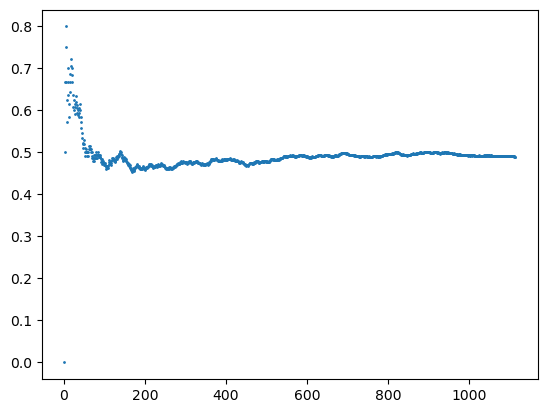

In [52]:
plt.scatter(relFreqsCsBernoulliBallOneOdd[:,0],relFreqsCsBernoulliBallOneOdd[:,1],s=1)

We have effectively plotted the maximum likelihood estimate or MLE $\widehat{\theta}_n$ for $\theta$ in our $Bernoulli$ model over increasing values of $n$.

We can also look at the shape of the whole log-likelihood function, not just the value that maximises it.

This interactive plot draws the log-likelihood function for samples based on for different values of $n$.  Again, for $n=1$, you have only observed the first draw, for $n=2$ you have observed two draws, etc etc.

In [34]:
@interact
def _(n=IntSlider(1,1,1114,100)):
    '''Interactive function to plot sample-size specific log likelihood function.'''
    if n == 1:
        print( "Log-likelihood function based on first sample")
    else:
        print( "log-likelihood function based on", n,  "samples"    )
    tn = csBernoulliBallOneOdd[n-1]
    #theta = var('theta')
    thetas = np.linspace(0,1,100)
    plt.plot(thetas,(1/n)*(tn*np.log(thetas)+(n-tn)*np.log(1-thetas)))
    #show(plot((tn * log(theta) + (n - tn) * log(1-theta)), theta,0,1),figsize=[8,3])

interactive(children=(IntSlider(value=1, description='n', max=1114, min=1, step=100), Output()), _dom_classes=…

Try changing $n$ to see how the shape of the log-likelihood function changes as we get more and more observations.  

We can also show the log likelihood functions for a number of different value of $n$ all on the same plot.  The first cell below shows log-likelihood functions for $n = 1$ to $n = 20$.  This is where the log-likelihood moves around most as $n$ changes.

In [53]:
n = np.arange(1,20)
1-((20-n)/20)**2

array([0.0975, 0.19  , 0.2775, 0.36  , 0.4375, 0.51  , 0.5775, 0.64  ,
       0.6975, 0.75  , 0.7975, 0.84  , 0.8775, 0.91  , 0.9375, 0.96  ,
       0.9775, 0.99  , 0.9975])

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_16708\3541578119.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(thetas,(tn*np.log(thetas)+(n-tn)*np.log(1-thetas)),color='blue',linewidth=0.2)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_16708\3541578119.py:4: RuntimeWarning: invalid value encountered in multiply
  plt.plot(thetas,(tn*np.log(thetas)+(n-tn)*np.log(1-thetas)),color='blue',linewidth=0.2)


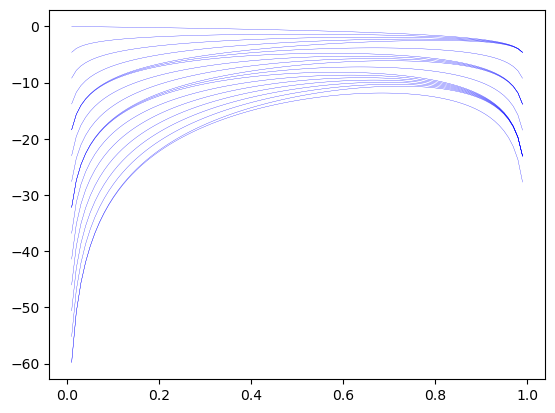

In [54]:
for n in range(1,20,1):
    tn = csBernoulliBallOneOdd[n-1]
    thetas = np.linspace(0,1,100)
    plt.plot(thetas,(tn*np.log(thetas)+(n-tn)*np.log(1-thetas)),color='blue',linewidth=0.2)
    #p += plot((Tn * log(theta) + (n-Tn)*log(1-theta)), theta,0,1)
#show(p, figsize=[6,3])

## Using Sympy for Basic Algebra and Calculus

When we wanted to differentiate the log-likelihood $l_n(\theta)$ above, we did it for ourselves, but Sympy could have helped us to do even that. 

Sage can be used to find solutions to equations and for basic calculus.  The secret is to create a symbolic expression using the `var(...)` function.  It is probably easiest to think of var as a way to tell Sympy that something is a variable name without having to assign that variable to an actual value. Then, using the function  solve  we can solve equations, i.e. use Sympy to find the value(s) of a variable which would solve the equation of interest, or expressions for one variable in terms of other variables involved in the equation(s).

The examples used here are taken from the book Sage Tutorial, The Sage Group.

In [55]:
x=1

In [56]:
type(x)

int

In [58]:
from sympy import var
x = var('x') # symbolic expression
type(x)

sympy.core.symbol.Symbol

In [ ]:
## uncommnet next line to read the docs of `var` as needed
#?var

In [ ]:
## uncommnet next line to read the docs of `solve` as needed
#?solve

Let's try a simple example, solving $x^2 + 3x + 2 = 0$ for $x$.

In [59]:
from sympy import solve
solve(x**2 + 3*x + 2, x,dict=True)

[{x: -2}, {x: -1}]

We can also use `solve` if we have variables instead of known values for the coefficients.

In [60]:
from sympy import Symbol
x, a, b, c = var('x a b c')
solve(a*(x**2) + b*x + c, x,dict=True)

[{x: (-b - sqrt(-4*a*c + b**2))/(2*a)}, {x: (-b + sqrt(-4*a*c + b**2))/(2*a)}]

And we can solve a system of equations for several variables.

In [61]:
x, y = var('x y')
solve([x+y-6, x-y-4], x, y)

{x: 5, y: 1}

Sometimes Sympy cannot find an exact solution to the equation, as in the following cell:

In [62]:
from sympy import cos,exp
theta = var('theta')
solve([cos(theta)-exp(theta)], theta,dict=True)

NotImplementedError: could not solve -exp(theta) + cos(theta)

Then we can try using the `nsolve` function to find a numerical solution.  Note that as well as the equation, you have to pass `nsolve(...)` the first guess.

In [63]:
from sympy import nsolve
nsolve(cos(theta)-exp(theta), theta,-1,dict=True,set=(-1,0))

[{theta: -1.29269571937340}]

In [64]:
## uncommnet next line to rwead the docs of `find_root` as needed
#?nsolve

We can also use calculus with our symbolic expressions.  We differentiate with the diff function or method.

In [65]:
from sympy import diff,sin
u = var('u')
diff(sin(u), u)

cos(u)

We can also tackle higher derivatives, such as the fourth derivative of $\sin(x^2)$ in the following cell.

In [66]:
x = var('x')
diff(sin(x**2), x, 4)

4*(4*x**4*sin(x**2) - 12*x**2*cos(x**2) - 3*sin(x**2))

In [67]:
## uncommnet next line to rwead the docs of `diff` as needed
#?diff

Partial derivatives can also be found:

In [68]:
x, y = var('x y')
f = x**2 + 17*y**2
diff(f,x) # differentiate f with respect to x

2*x

Let's try a simple example.

In [69]:
x, y = var('x y')
f = x**2 + 17*y**2
diff(f,y) # differentiate f with respect to y

34*y

The `integrate(...)` function does integration.

In [70]:
from sympy import integrate
x = var('x')
integrate(x*sin(x**2), x)

-cos(x**2)/2

What about integrals that dont have closed form solutions?

In [71]:
from sympy import E
x = var('x')
integrate(E**(x**2),x)

sqrt(pi)*erfi(x)/2

### Symbolic Expressions for the Maximum Likelihood Estimator

We can use these SageMath capabilities to help us to find maximum likelihood estimators.   We will first have to find an expression for the likelihood of the parameter(s) in terms of of some statistic or statistics of the observations.  We then take logs to get a log-likelihood function (since logs are usually easier to work with).  Then, with the Sage diff function and the solve function, we have some powerful tools to then help us to differentiate and find the value at which the differential is 0. 

Let's start with the Bernoulli log-likelihood function $l_n(\theta) = \log( L_n(\theta))$ = $t_n$ $\log(\theta)$ + $(n-t_n)$ $\log(1-\theta)$ and first of all find an expression for the differential of this with respect to $\theta$

In [72]:
from sympy import log
theta, n, tn = var('theta n tn')
logL = tn*log(theta) + (n-tn)*log(1-theta) # Bernoulli log likelihood
dlogL = diff(logL,theta)
dlogL

-(n - tn)/(1 - theta) + tn/theta

And then solve for $\theta$ when the differential is zero:

In [73]:
solve(dlogL, theta,dict=True)

[{theta: tn/n}]

Magic!  We get the expression for $\widehat{\theta}_n$ that we derived before!

#### YouTry later

Try `diff`, `integral`, and `solve` on some other functions